### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

### Import Datasets

In [2]:
df = pd.read_excel("trucks.xlsx")
df.head()

,Origin,Destination,Mileage,Equipment Type,Shipper to Carrier Contract,Average,Per Mile
0,EDISON,MYERSTOWN,120,REEFER,742 - 1103,894,7.450000
1,EDISON,MYERSTOWN,120,DRYVAN,518 - 790,712,5.933333
2,KEASBEY,EDISON,7,DRYVAN,184 - 541,416,59.428571
3,KEASBEY,MYERSTOWN,125,REEFER,745 - 1017,897,7.176000
4,KEASBEY,MYERSTOWN,125,DRYVAN,758 - 1018,921,7.368000


In [3]:
df["Minimum Shipper to Carrier Contract"] = df["Shipper to Carrier Contract"].str.split(" - ").str.get(0).astype("int")
df["Maximum Shipper to Carrier Contract"] = df["Shipper to Carrier Contract"].str.split(" - ").str.get(1).astype("int")

In [4]:
del df["Shipper to Carrier Contract"]

In [5]:
df.head()

,Origin,Destination,Mileage,Equipment Type,Average,Per Mile,Minimum Shipper to Carrier Contract,Maximum Shipper to Carrier Contract
0,EDISON,MYERSTOWN,120,REEFER,894,7.450000,742,1103
1,EDISON,MYERSTOWN,120,DRYVAN,712,5.933333,518,790
2,KEASBEY,EDISON,7,DRYVAN,416,59.428571,184,541
3,KEASBEY,MYERSTOWN,125,REEFER,897,7.176000,745,1017
4,KEASBEY,MYERSTOWN,125,DRYVAN,921,7.368000,758,1018


### Mileage by Origin

In [6]:
mo = df.groupby("Origin")["Mileage"].agg(["min", "mean", "max"]).round(2)
mo

,min,mean,max
Origin,,,
EDISON,120,120.00,120
KEASBEY,7,85.67,125
MAINLAND,64,64.00,64
MYERSTOWN,20,84.44,155
SOUTH PLAINFIELD,120,120.00,120


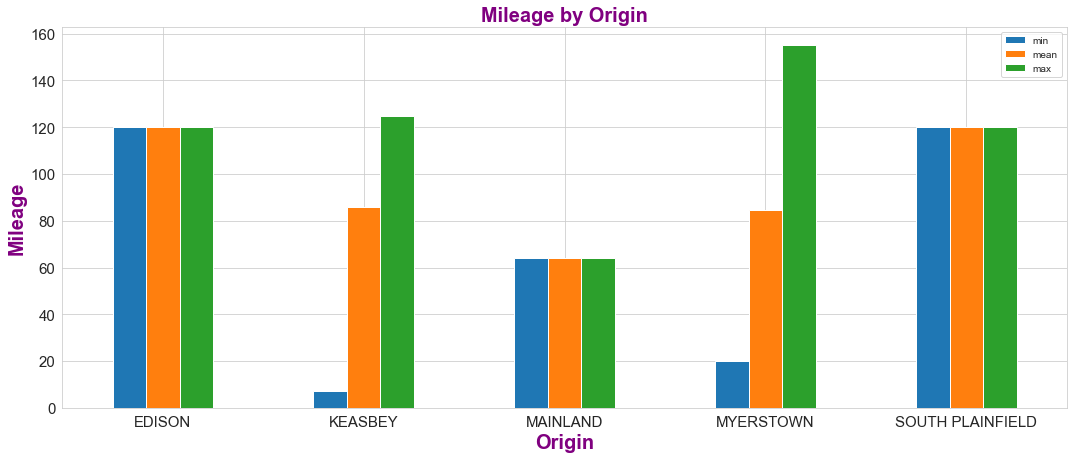

In [7]:
mo.plot(kind = "bar", figsize = (18, 7))
plt.title("Mileage by Origin", size = 20, color = "purple", weight = "bold")
plt.xlabel("Origin", size = 20, color = "purple", weight = "bold")
plt.ylabel("Mileage", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Equipment Type by Origin

In [8]:
eo = df.groupby(["Origin", "Equipment Type"])["Equipment Type"].agg(["count"])
eo

count
Origin           Equipment Type       
EDISON           DRYVAN              1
                 REEFER              1
KEASBEY          DRYVAN              2
                 REEFER              1
MAINLAND         DRYVAN              1
MYERSTOWN        DRYVAN             21
                 REEFER              4
SOUTH PLAINFIELD REEFER              1

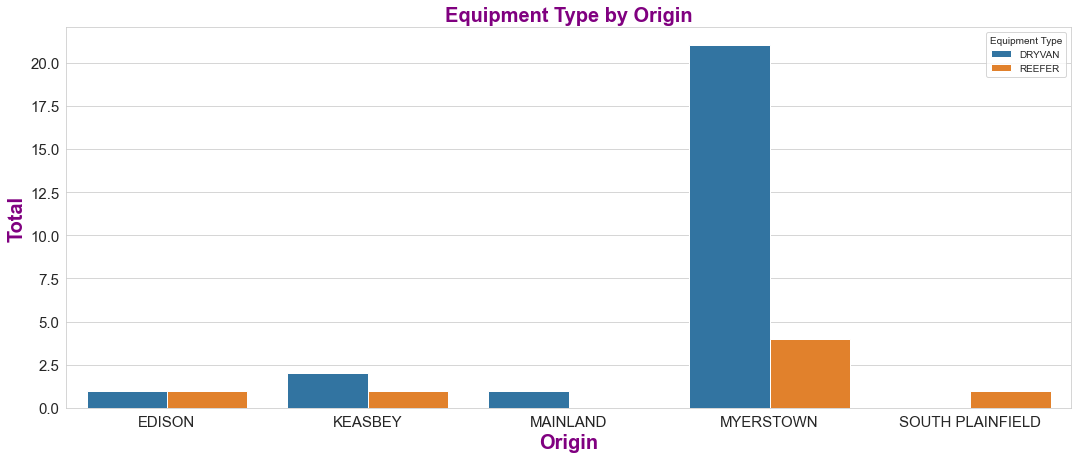

In [9]:
eo = eo.reset_index()
plt.figure(figsize = (18, 7))
sns.barplot(x = "Origin", y = "count", hue = "Equipment Type", data = eo)
plt.title("Equipment Type by Origin", size = 20, color = "purple", weight = "bold")
plt.xlabel("Origin", size = 20, color = "purple", weight = "bold")
plt.ylabel("Total", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Average by Origin

In [10]:
ao = df.groupby("Origin")["Average"].agg(["min", "mean", "max"]).round(2)
ao

,min,mean,max
Origin,,,
EDISON,712,803.00,894
KEASBEY,416,744.67,921
MAINLAND,593,593.00,593
MYERSTOWN,412,657.08,909
SOUTH PLAINFIELD,713,713.00,713


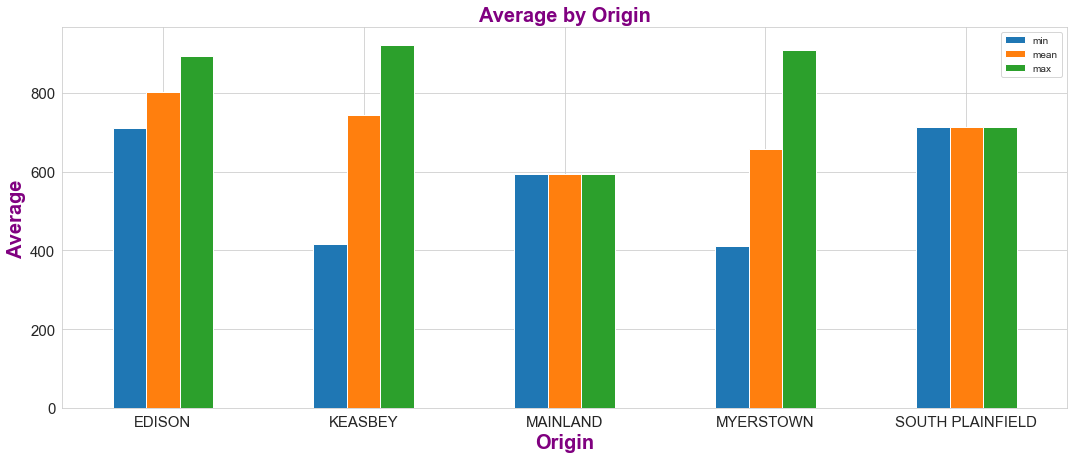

In [11]:
ao.plot(kind = "bar", figsize = (18, 7))
plt.title("Average by Origin", size = 20, color = "purple", weight = "bold")
plt.xlabel("Origin", size = 20, color = "purple", weight = "bold")
plt.ylabel("Average", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Per Mile by Origin

In [12]:
df.head(2)

,Origin,Destination,Mileage,Equipment Type,Average,Per Mile,Minimum Shipper to Carrier Contract,Maximum Shipper to Carrier Contract
0,EDISON,MYERSTOWN,120,REEFER,894,7.450000,742,1103
1,EDISON,MYERSTOWN,120,DRYVAN,712,5.933333,518,790


In [13]:
po = df.groupby("Origin")["Per Mile"].agg(["min", "mean", "max"]).round(2)
po

,min,mean,max
Origin,,,
EDISON,5.93,6.69,7.45
KEASBEY,7.18,24.66,59.43
MAINLAND,9.27,9.27,9.27
MYERSTOWN,4.60,9.20,20.60
SOUTH PLAINFIELD,5.94,5.94,5.94


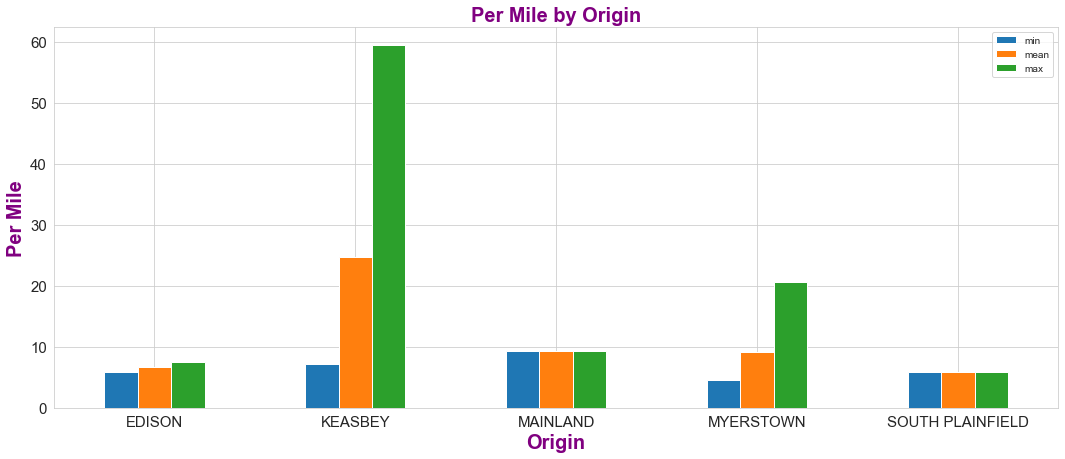

In [14]:
po.plot(kind = "bar", figsize = (18, 7))
plt.title("Per Mile by Origin", size = 20, color = "purple", weight = "bold")
plt.xlabel("Origin", size = 20, color = "purple", weight = "bold")
plt.ylabel("Per Mile", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Minimum Shipper to Carrier Contract by Origin

In [15]:
minsh = df.groupby("Origin")["Minimum Shipper to Carrier Contract"].agg(["min", "mean", "max"]).round(2)
minsh

,min,mean,max
Origin,,,
EDISON,518,630.00,742
KEASBEY,184,562.33,758
MAINLAND,457,457.00,457
MYERSTOWN,195,474.88,763
SOUTH PLAINFIELD,519,519.00,519


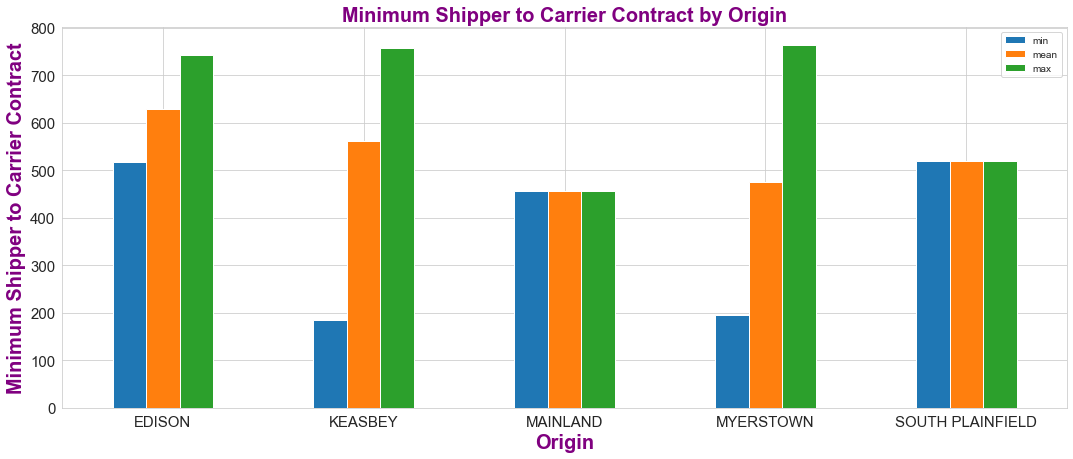

In [16]:
minsh.plot(kind = "bar", figsize = (18, 7))
plt.title("Minimum Shipper to Carrier Contract by Origin", size = 20, color = "purple", weight = "bold")
plt.xlabel("Origin", size = 20, color = "purple", weight = "bold")
plt.ylabel("Minimum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Maximum Shipper to Carrier Contract by Origin

In [17]:
maxsh = df.groupby("Origin")["Maximum Shipper to Carrier Contract"].agg(["min", "mean", "max"]).round(2)
maxsh

,min,mean,max
Origin,,,
EDISON,790,946.50,1103
KEASBEY,541,858.67,1018
MAINLAND,717,717.00,717
MYERSTOWN,422,768.20,1009
SOUTH PLAINFIELD,791,791.00,791


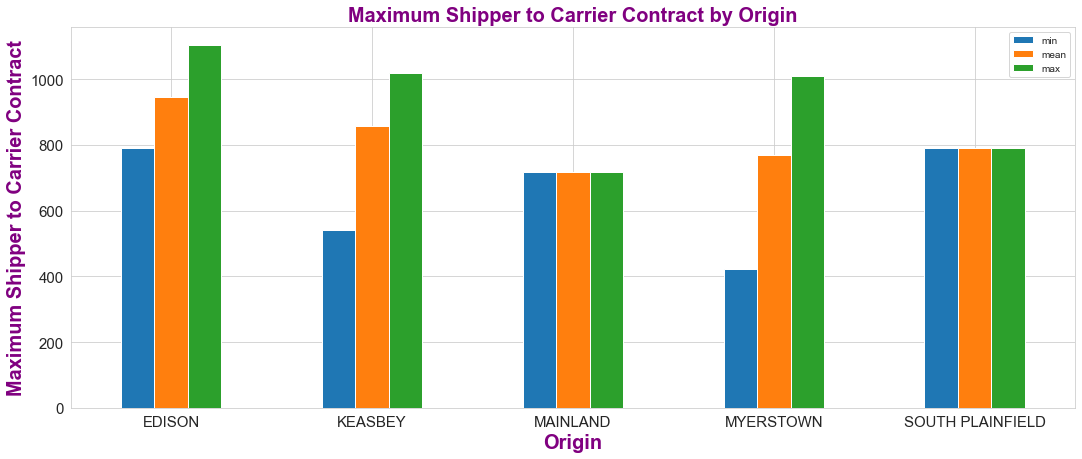

In [18]:
maxsh.plot(kind = "bar", figsize = (18, 7))
plt.title("Maximum Shipper to Carrier Contract by Origin", size = 20, color = "purple", weight = "bold")
plt.xlabel("Origin", size = 20, color = "purple", weight = "bold")
plt.ylabel("Maximum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Mileage by Equipment Type

In [19]:
me = df.groupby("Equipment Type")["Mileage"].agg(["min", "mean", "max"]).round(2)
me

,min,mean,max
Equipment Type,,,
DRYVAN,7,85.64,155
REEFER,48,93.00,125


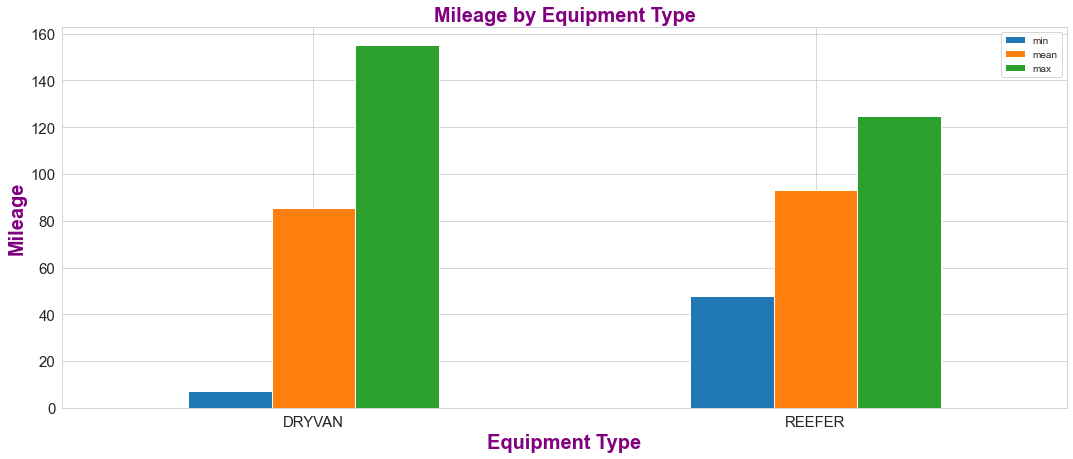

In [20]:
me.plot(kind = "bar", figsize = (18, 7))
plt.title("Mileage by Equipment Type", size = 20, color = "purple", weight = "bold")
plt.xlabel("Equipment Type", size = 20, color = "purple", weight = "bold")
plt.ylabel("Mileage", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Average by Equipment Type

In [21]:
ae = df.groupby("Equipment Type")["Average"].agg(["min", "mean", "max"]).round(2)
ae

,min,mean,max
Equipment Type,,,
DRYVAN,412,635.16,921
REEFER,661,813.43,909


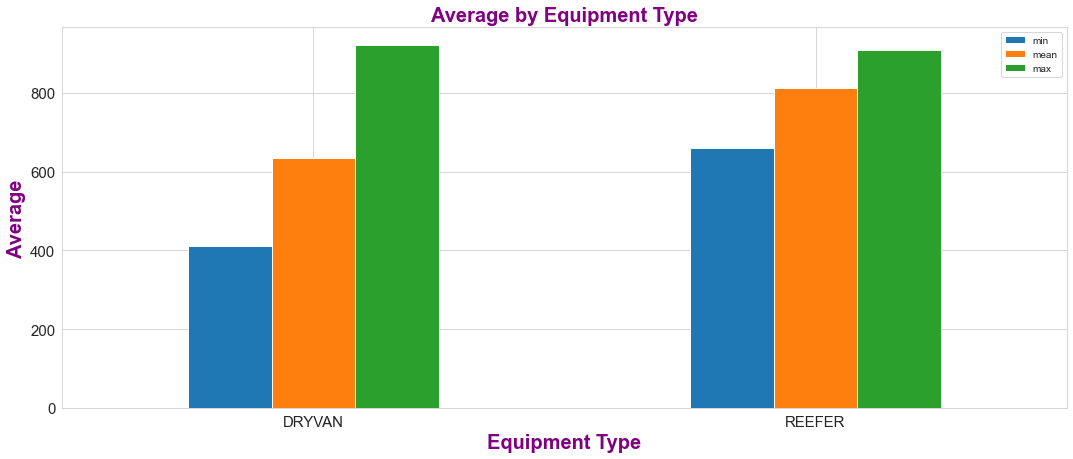

In [22]:
ae.plot(kind = "bar", figsize = (18, 7))
plt.title("Average by Equipment Type", size = 20, color = "purple", weight = "bold")
plt.xlabel("Equipment Type", size = 20, color = "purple", weight = "bold")
plt.ylabel("Average", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Per Mile by Equipment Type

In [23]:
pe = df.groupby("Equipment Type")["Per Mile"].agg(["min", "mean", "max"]).round(2)
pe

,min,mean,max
Equipment Type,,,
DRYVAN,4.60,10.53,59.43
REEFER,5.94,9.91,13.95


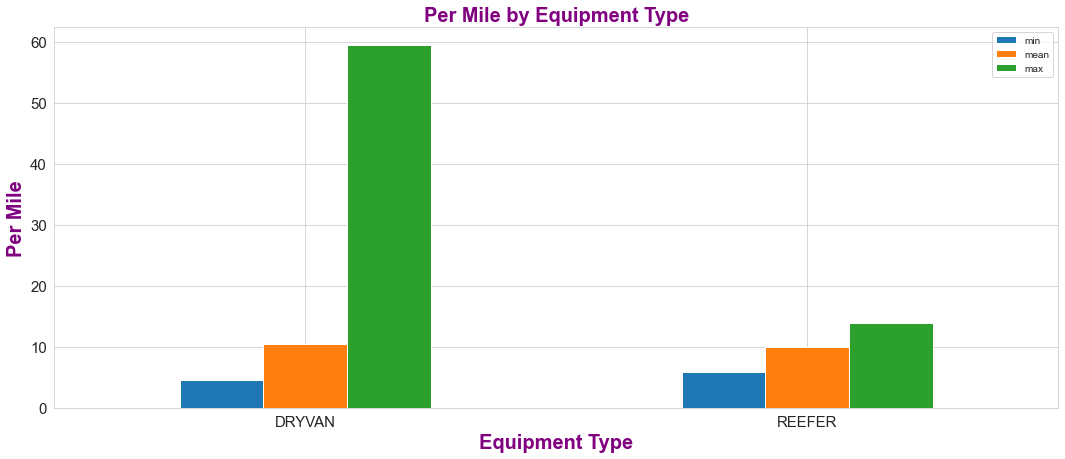

In [24]:
pe.plot(kind = "bar", figsize = (18, 7))
plt.title("Per Mile by Equipment Type", size = 20, color = "purple", weight = "bold")
plt.xlabel("Equipment Type", size = 20, color = "purple", weight = "bold")
plt.ylabel("Per Mile", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Minimum Shipper to Carrier Contract by Equipment Type

In [25]:
mine = df.groupby("Equipment Type")["Minimum Shipper to Carrier Contract"].agg(["min", "mean", "max"]).round(2)
mine

,min,mean,max
Equipment Type,,,
DRYVAN,184,450.80,758
REEFER,510,646.43,763


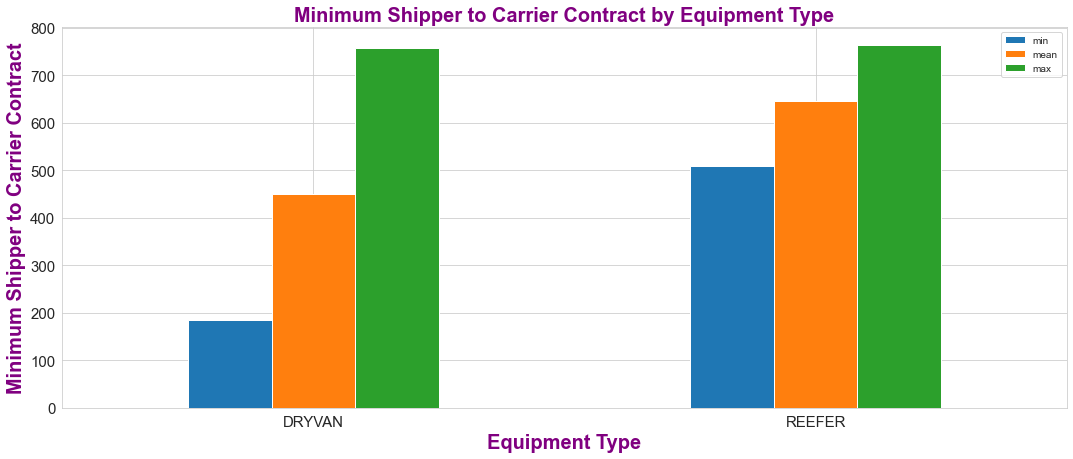

In [26]:
mine.plot(kind = "bar", figsize = (18, 7))
plt.title("Minimum Shipper to Carrier Contract by Equipment Type", size = 20, color = "purple", weight = "bold")
plt.xlabel("Equipment Type", size = 20, color = "purple", weight = "bold")
plt.ylabel("Minimum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Maximum Shipper to Carrier Contract by Equipment Type

In [27]:
maxe = df.groupby("Equipment Type")["Maximum Shipper to Carrier Contract"].agg(["min", "mean", "max"]).round(2)
maxe

,min,mean,max
Equipment Type,,,
DRYVAN,422,745.40,1018
REEFER,773,935.29,1103


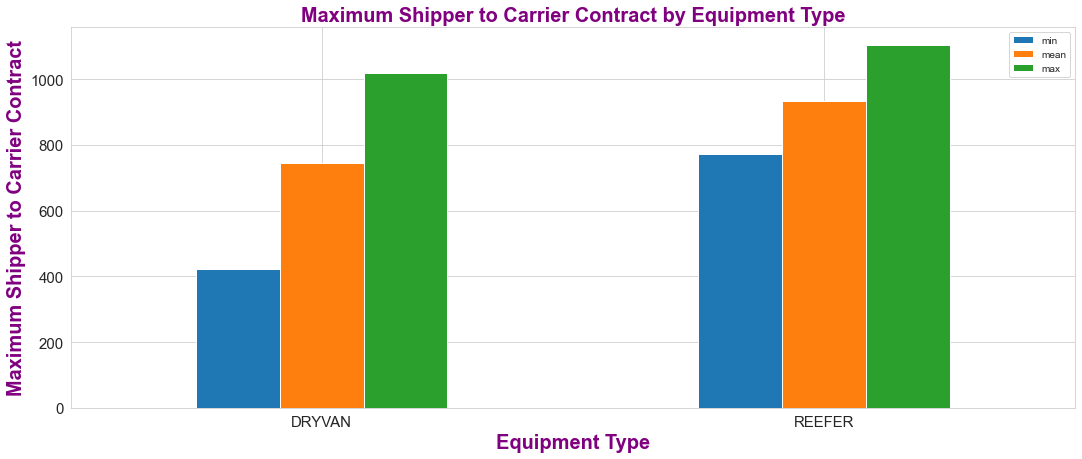

In [28]:
maxe.plot(kind = "bar", figsize = (18, 7))
plt.title("Maximum Shipper to Carrier Contract by Equipment Type", size = 20, color = "purple", weight = "bold")
plt.xlabel("Equipment Type", size = 20, color = "purple", weight = "bold")
plt.ylabel("Maximum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Mileage by Average

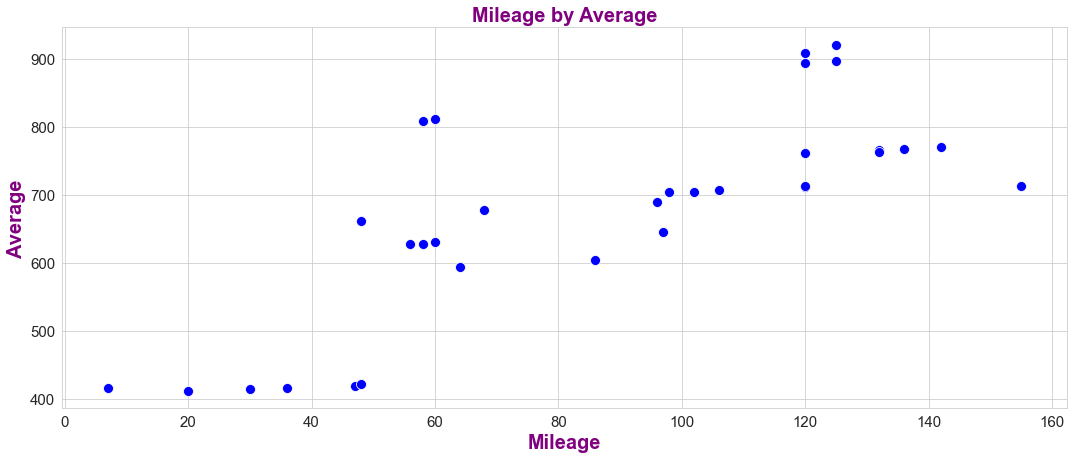

In [29]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "Mileage", y = "Average", data = df, color = "blue", s = 100)
plt.title("Mileage by Average", size = 20, color = "purple", weight = "bold")
plt.xlabel("Mileage", size = 20, color = "purple", weight = "bold")
plt.ylabel("Average", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Mileage by Per Mile Cost

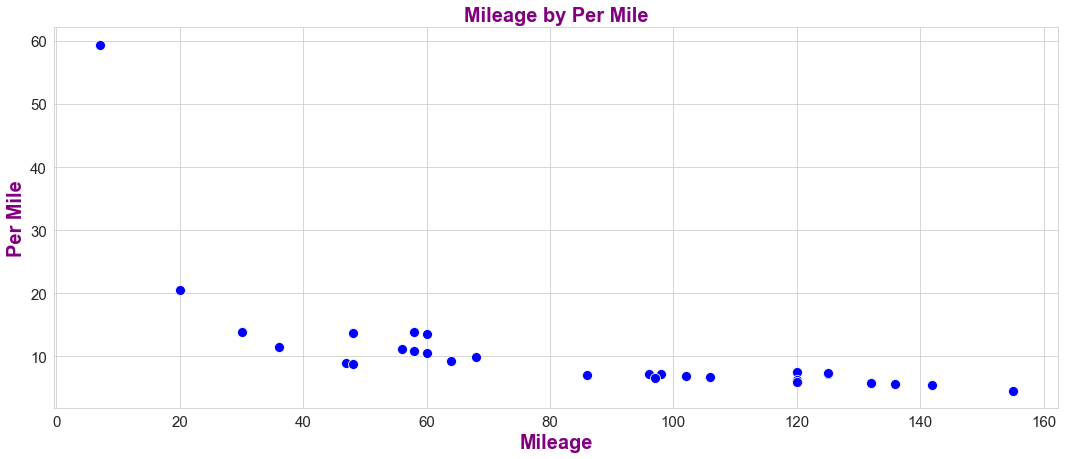

In [30]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "Mileage", y = "Per Mile", data = df, color = "blue", s = 100)
plt.title("Mileage by Per Mile", size = 20, color = "purple", weight = "bold")
plt.xlabel("Mileage", size = 20, color = "purple", weight = "bold")
plt.ylabel("Per Mile", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Mileage by Minimum Shipper to Carrier Contract

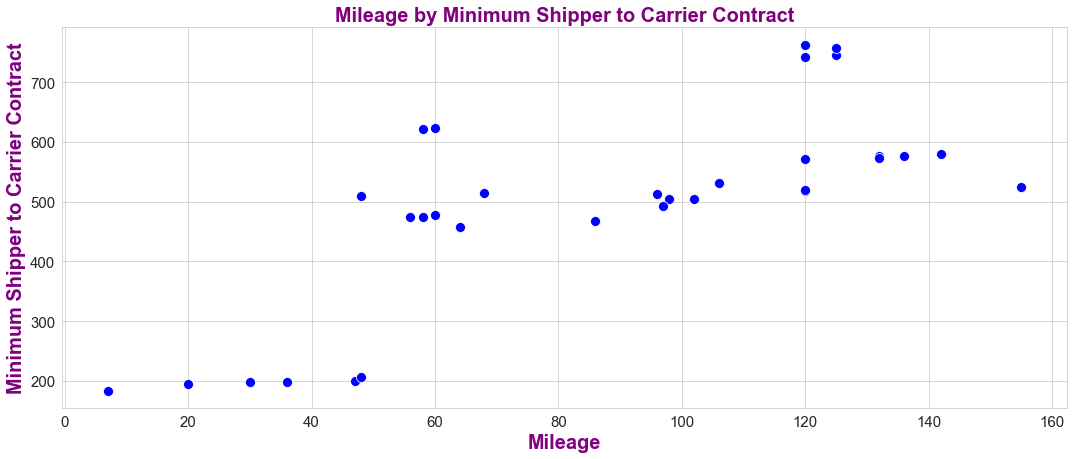

In [31]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "Mileage", y = "Minimum Shipper to Carrier Contract", data = df, color = "blue", s = 100)
plt.title("Mileage by Minimum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xlabel("Mileage", size = 20, color = "purple", weight = "bold")
plt.ylabel("Minimum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Mileage by Maximum Shipper to Carrier Contract

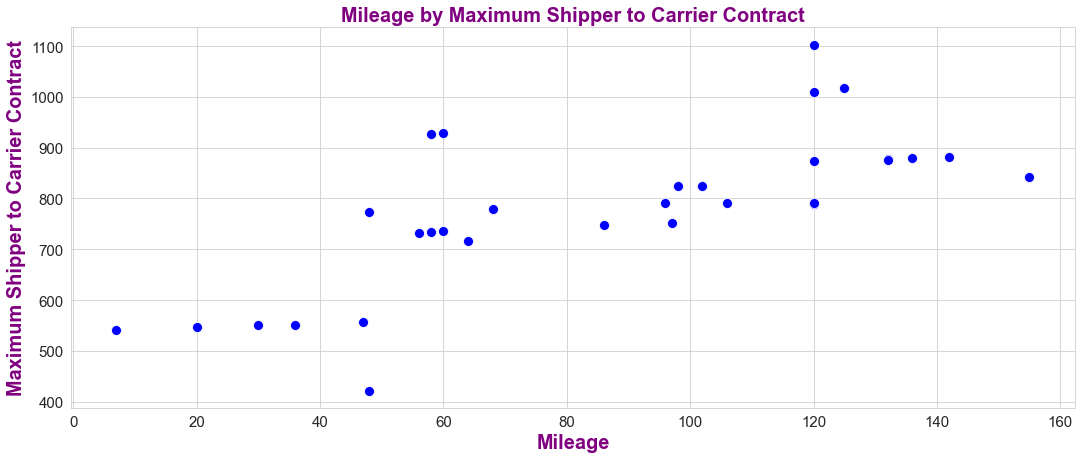

In [32]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "Mileage", y = "Maximum Shipper to Carrier Contract", data = df, color = "blue", s = 100)
plt.title("Mileage by Maximum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xlabel("Mileage", size = 20, color = "purple", weight = "bold")
plt.ylabel("Maximum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Average by Per Mile

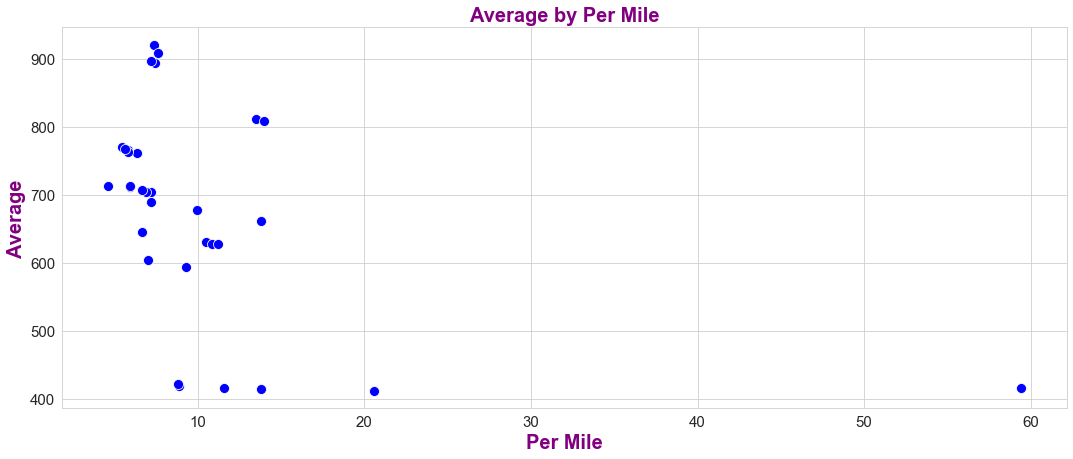

In [33]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "Per Mile", y = "Average", data = df, color = "blue", s = 100)
plt.title("Average by Per Mile", size = 20, color = "purple", weight = "bold")
plt.xlabel("Per Mile", size = 20, color = "purple", weight = "bold")
plt.ylabel("Average", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Distribution of Mileage

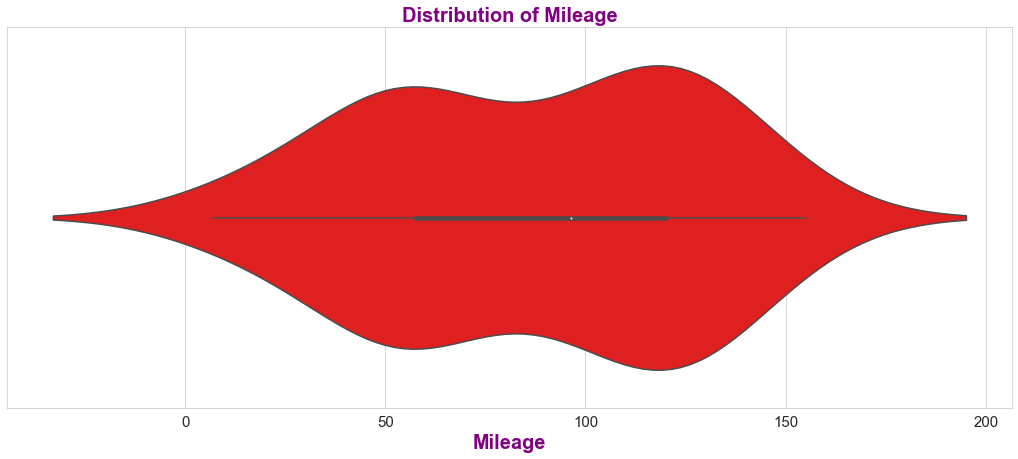

In [34]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = df["Mileage"], color = "red")
plt.title("Distribution of Mileage", size = 20, color = "purple", weight = "bold")
plt.xlabel("Mileage", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Distribution of Average

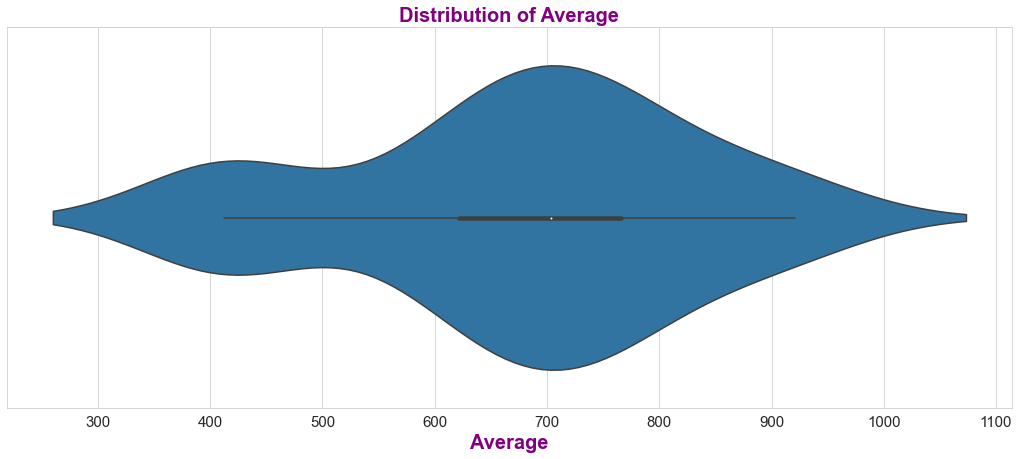

In [35]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = df["Average"])
plt.title("Distribution of Average", size = 20, color = "purple", weight = "bold")
plt.xlabel("Average", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Distribition of Per Mile

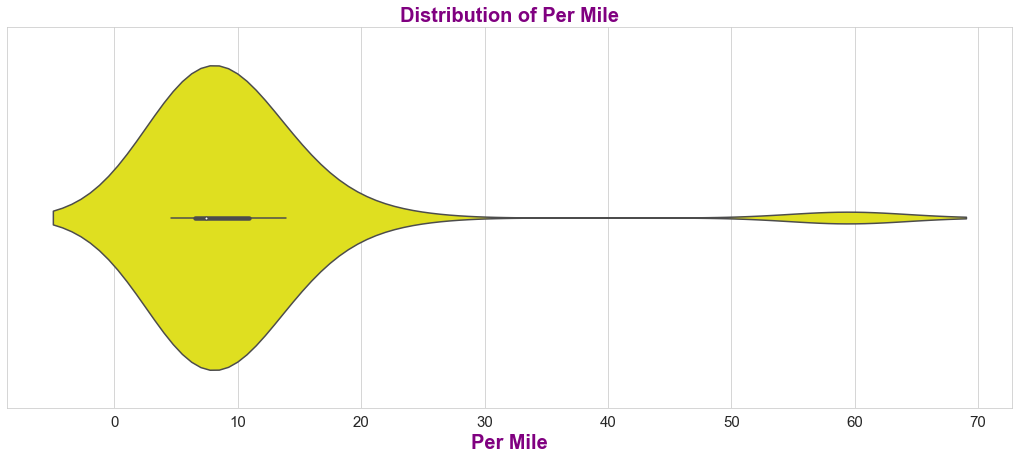

In [36]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = df["Per Mile"], color = "yellow")
plt.title("Distribution of Per Mile", size = 20, color = "purple", weight = "bold")
plt.xlabel("Per Mile", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Distribution of Minimum Shipper to Carrier Contract

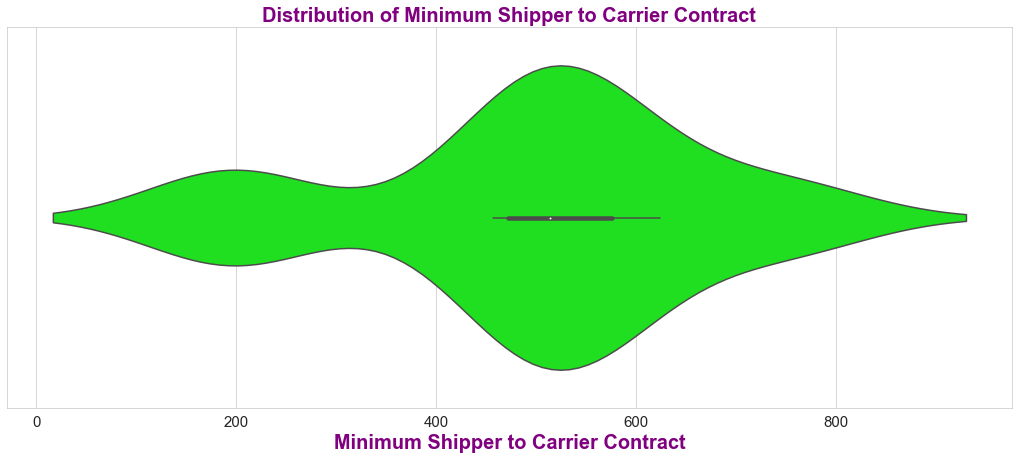

In [37]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = df["Minimum Shipper to Carrier Contract"], color = "lime")
plt.title("Distribution of Minimum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xlabel("Minimum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

### Distribution of Maximum Shipper to Carrier Contract

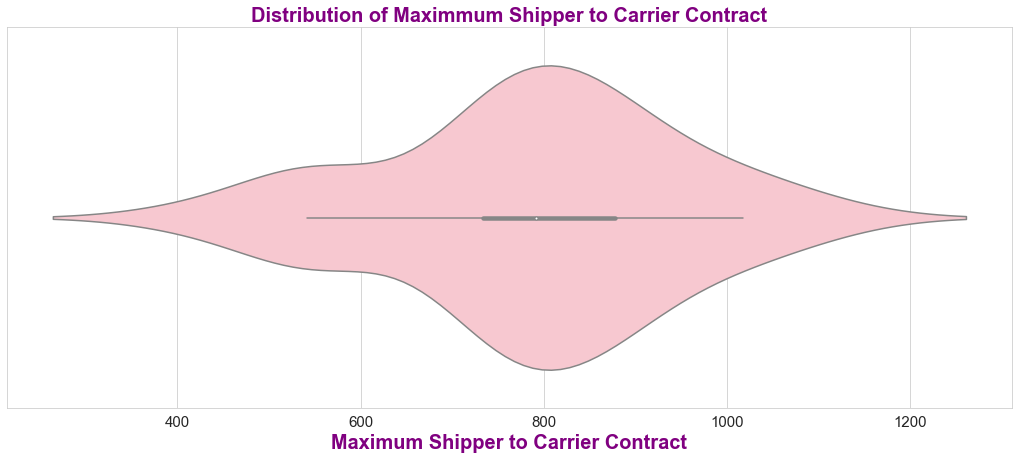

In [38]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = df["Maximum Shipper to Carrier Contract"], color = "pink")
plt.title("Distribution of Maximmum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xlabel("Maximum Shipper to Carrier Contract", size = 20, color = "purple", weight = "bold")
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()